# Lab 8 Explainability

***
- **FIRST name**: Muhammad Affan
- **LAST name**: Nazir
- **Student ID**:

Leave blank if individual:
- **Collaborator names**:
- **Collaborator student IDs**:
***

# Lab 8:

In today's lab, you will learn:

1.   Using the LIME package for explanations.

For this lab, you'll need the dataset `iris.csv`.


In [2]:
#run this cell
!pip install lime
import sklearn
import sklearn.ensemble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
np.random.seed(1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular

np.random.seed(1)

# 1. Pre-processing the Data

We will use sklearn's dataset module to load the iris dataset

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(iris_df.head(5))
print(iris_df.shape)
print(iris_df["target"].unique())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
(150, 5)
[0 1 2]


This dataset contains three iris species: setosa, versicolor, and virginica. It also contains the flower's petal length, petal width, sepal length, and sepal width. Our goal in this lab is to use sklearn's Random Forest Classifer to predict what species of iris we have given its measurements.
To learn more about Random Forests, see [here](https://www.ibm.com/topics/random-forest).

**Question 1.1.** Recall that we denote `X` as our features and `Y` as our target. Separate the dataset into its features and target.

In [4]:
# YOUR CODE HERE
X = iris_df.iloc[:,0:4]
Y = iris_df.iloc[:,4:]

# 2. Train

We first split our X and Y datasets in two:
1. Training set: this subset is used to train the model. It usually makes up 80% of the data;
2. Testing set: this subset is used to test the model to see how it performs. It usually makes up 20% of the data.

This is done for the features and the targets separately. It's important that the test data is not used to train the model because it could lead to memorizing the data.

**Question 2.1.** First import sklearn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), then split the data into `X_train`, `X_test`. `Y_train`, and `Y_test` respectively. The parameter `test_size` sets the proportion of data for the testing subset (set to 0.2). The `random_state` parameter controls how much the data is shuffled before being split.

In [5]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    np.array(X), np.array(Y), test_size=0.2, random_state=42)

Let's first scale the features



In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

## Fit Random Forest model
We use the sklearn function `RandomForestClassifer`to fit our random forest classifier.  Set the parameter `n_estimators` to 500. Assign your answer to `rf_model`.

In [7]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=73)
rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(n_estimators=500, random_state=73)

# 3. Predicting and Assessing

Now that we have our model, we can start making predictions on our iris data.

**Question 3.1.** Use the `.predict` method to make predictions and assign your answer to `Y_pred`. Make sure you use the right feature subset (training vs. testing)!

In [8]:
# YOUR CODE HERE
Y_pred = rf_model.predict(X_test_scaled)

We print the X_test subset and Y_pred to better understand what's going on. X_test contains 30 random flowers and their metrics. Y_pred is an array of 30 predictions where 0 denotes setosa, 1 denotes versicolor, and 2 denotes verginica.



## Explainations

We first need to create the explainer from the lime module.


In [9]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=iris.target_names,
    mode='classification'
)

Now we choose an instance to explain, say the first one in the test set.   

In [10]:
instance = X_test_scaled[2]
print(instance)

[ 2.30486738 -1.0322392   1.8185001   1.49058286]


Generate an explanation, using say 4 features.

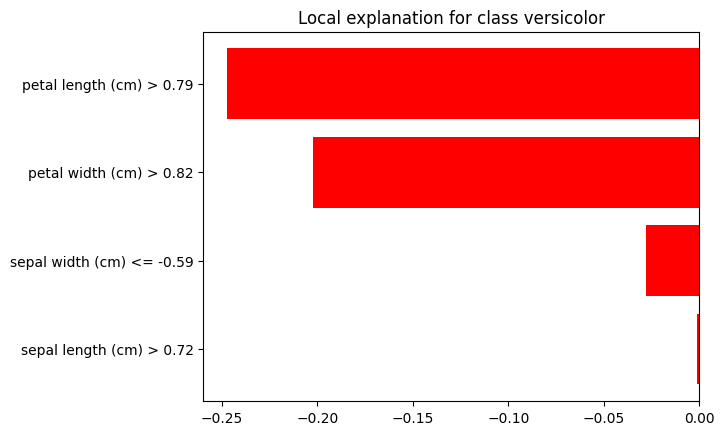

[('petal length (cm) > 0.79', -0.24714229371873678), ('petal width (cm) > 0.82', -0.20195387012723878), ('sepal width (cm) <= -0.59', -0.02810009038152405), ('sepal length (cm) > 0.72', -0.0012785076024144097)]


In [11]:
exp = explainer.explain_instance(instance, rf_model.predict_proba, num_features=4)

# Visualize explanation
exp.as_pyplot_figure()
plt.show()

# Print feature importance
print(exp.as_list())

**Question 3.2**
Write an explanation for what you see in the visulatization

We can see that having the petal length greater than 0.79 affects the classification on a greatly. It decreases the probability that the flower is versicolor, since the weight is negative and has big magnitude. Simiarly, having petal width > 0.82 cm also decreases the probability that the flower is versicolor. Having sepal width less than or equal to 0.59 or having sepal length > 0.72 also negatively effects the probability, decreasing the chance for the flower to be classified in the given class, however the affect is less since the magnitude of the weight is lower.

**Question 3.3** Now get an explanation for another instance and write an explanation of what you see in the visualization.

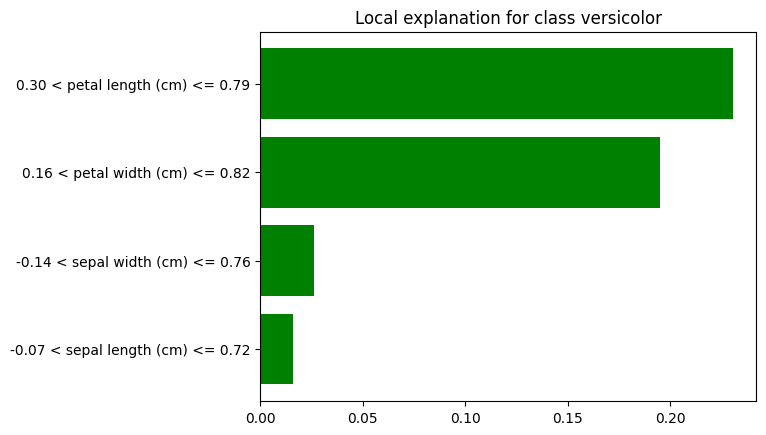

[('0.30 < petal length (cm) <= 0.79', 0.23033038382841853), ('0.16 < petal width (cm) <= 0.82', 0.1951567524695144), ('-0.14 < sepal width (cm) <= 0.76', 0.026388482302128712), ('-0.07 < sepal length (cm) <= 0.72', 0.015969672748278423)]


In [12]:
instance = X_test_scaled[15]
exp = explainer.explain_instance(instance, rf_model.predict_proba, num_features=4)
exp.as_pyplot_figure()
plt.show()
print(exp.as_list())

As we can see, having a petal length between 0.3 and 0.79, and having petal width between 0.16 and 0.82 increase the chance that the flower is versicolor, since the magnitude of the weight is a high positive (0.237 and 0.18 respectively). Similarly, having sepal length between -0.07 and 0.72, and sepal width between -0.14 and 0.76 also increases the chance of the flower being classified as versicolor, except for the fact that it has a smaller contribution since the weight is less in magnitude (only 0.0255 and )

# Rubric

| Question | Points|
|----------|----------|
| 1.1.    | 10   |
| 2.1.    | 15   |
| 3.1.    | 5   |
| 3.2.    | 15   |
| 3.3.    | 15   |

| Total:    | 60   |